In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 7s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

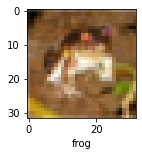

In [9]:
plot_sample(X_train, y_train, 0)

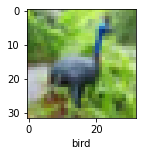

In [10]:
plot_sample(X_train, y_train, 6)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

Normalizing the training data

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build simple artificial neural network for image classification

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 106s 67ms/step - loss: 1.8096 - accuracy: 0.3550
Epoch 2/5
1563/1563 [==============================] - 104s 66ms/step - loss: 1.6228 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5419 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4807 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.4331 - accuracy: 0.4944


You can see that at the end of 5 epochs, accuracy is at around 49%



In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 18s 55ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.42      0.51      1000
           1       0.60      0.62      0.61      1000
           2       0.39      0.23      0.29      1000
           3       0.36      0.29      0.32      1000
           4       0.36      0.51      0.42      1000
           5       0.59      0.17      0.27      1000
           6       0.37      0.76      0.49      1000
           7       0.71      0.35      0.47      1000
           8       0.47      0.76      0.58      1000
           9       0.54      0.53      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.45     10000
weighted avg       0.50      0.47      0.45     10000



Now let us build a convolutional neural network to train our images

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.4585 - accuracy: 0.4781
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1033 - accuracy: 0.6145
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9687 - accuracy: 0.6616
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8932 - accuracy: 0.6898
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8242 - accuracy: 0.7138
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7701 - accuracy: 0.7308
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7230 - accuracy: 0.7492
Epoch 8/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6796 - accuracy: 0.7614
Epoch 9/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6358 - accuracy: 0.7777
Epoch 10/10
1563/1563 [==============================] - 69s 44m


With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.9088 - accuracy: 0.7005


[0.9087808728218079, 0.7005000114440918]

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 9s 27ms/step


array([[1.2530072e-05, 3.4209513e-04, 7.9672762e-05, 9.4046652e-01,
        1.0828879e-03, 2.8618261e-02, 3.9779837e-04, 2.6434695e-05,
        2.8966147e-02, 7.4771115e-06],
       [2.9583299e-03, 1.3662713e-02, 4.2676899e-07, 1.3697943e-06,
        1.1213936e-06, 3.8508531e-08, 1.0115465e-07, 1.0384272e-09,
        9.8219860e-01, 1.1772121e-03],
       [1.9107653e-01, 6.3511276e-01, 4.4328775e-04, 6.2337257e-03,
        3.6647983e-03, 1.9272472e-04, 5.6853658e-04, 6.6204972e-05,
        9.5036715e-02, 6.7604661e-02],
       [7.6066905e-01, 7.1998062e-03, 1.4771739e-02, 4.2492873e-04,
        1.1900084e-02, 4.4068290e-07, 5.2116484e-05, 2.1468129e-06,
        2.0382541e-01, 1.1541775e-03],
       [3.1931531e-06, 3.6882622e-05, 1.2617275e-02, 1.4822936e-02,
        5.7158929e-01, 3.1217656e-04, 4.0024486e-01, 2.3267943e-05,
        3.4974903e-04, 2.7691959e-07]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 8, 1, 0, 4]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

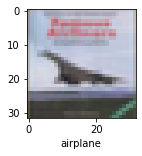

In [34]:
plot_sample(X_test, y_test,3)

In [35]:
classes[y_classes[3]]

'airplane'